In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

Using TensorFlow backend.


(60000, 28, 28)


In [4]:
matplotlib.rcParams['figure.figsize'] = (2, 2)

In [5]:
X = x_train

Y= y_train

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
X = x_train[0:10000,:]
Y = y_train[0:10000]
n_samples = X.shape[0]
print(n_samples)

10000


In [8]:
np.random.seed(1)

In [9]:
samples_to_plot = 10
indexes = np.random.randint(0, high=n_samples, size= [samples_to_plot])

In [10]:
print(indexes)

[ 235 5192  905 7813 2895 5056  144 4225 7751 3462]


In [11]:
X_noisy = X + 60*np.random.randn(X.shape[0], X.shape[1], X.shape[2])

In [12]:
X_noisy= X_noisy.reshape((X.shape[0], -1))
X_noisy.shape

(10000, 784)

In [13]:
X_c = X_noisy - np.mean(X_noisy, axis=0)
print(X_c.shape)

(10000, 784)


In [14]:
print(X_c)

[[  14.97707421 -116.69261693  -90.73378039 ... -112.48583576
    28.23749673   -5.97901216]
 [ -78.3858089     7.27146485  -85.37192408 ...   18.36761561
   -76.90099603   14.43219875]
 [   6.83353344   15.32179381  -17.82252754 ...  -34.93947802
   -62.65810525   50.29486782]
 ...
 [  -0.32902975    9.47960818  -74.05701603 ...  -26.89887817
    54.79253803   31.47588583]
 [  54.66904153   -3.93966017  126.60270867 ...   -5.23978031
    14.32013401 -126.76588631]
 [  12.60017334   21.07252785  -59.73842007 ...   95.03692644
    37.60030388  -58.34809878]]


In [15]:
covmat = np.cov(X_c.T)
#print ("Shape of Covariance matrix :", covmat.shape)

In [17]:
eigen=np.linalg.eig(covmat)
Values = eigen[0]
Vectors = eigen[1]
#print ("Shape of values matrix :", values.shape)
#print(Values)

In [19]:
S = np.argsort(Values)[::-1]
Values = Values[S]
Vectors = Vectors[:,S]
values_cumsum = np.cumsum(Values)
#print(values_cumsum)
#print(Vectors)

In [20]:
values_cumsum[-1]

6251155.185872723

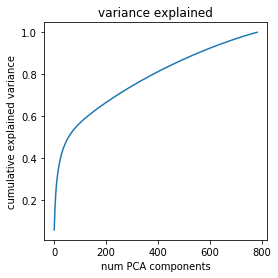

In [21]:
plt.figure(figsize=(4,4))
plt.plot(values_cumsum/values_cumsum[-1])
plt.title('variance explained')
plt.xlabel('num PCA components')
plt.ylabel('cumulative explained variance')
plt.show()

In [22]:
index_per = int(len(values_cumsum)*.15)
print(index_per)

117


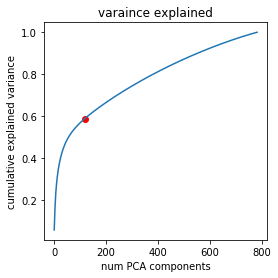

In [23]:
plt.figure(figsize=(4,4))

plt.plot(index_per, values_cumsum[index_per]/values_cumsum[-1], 'ro')
plt.plot(values_cumsum/values_cumsum[-1])
plt.title('varaince explained')
plt.xlabel('num PCA components')
plt.ylabel('cumulative explained variance')
plt.show()

In [24]:
##117 is the number of principle components, each component is a combination of all the 784 variables.
## Ex: P1=a1x1 + a2x2 + ... + a784x784 , p2=b1x1 + b2x2 + ... + b784x784 and so on

In [25]:
reduced_dim = index_per

In [26]:
X_proj= np.dot(X_c, Vectors[:, :reduced_dim])

In [27]:
print(X_proj.shape)

(10000, 117)


In [28]:
X_reconstructed = np.dot(X_proj,Vectors.T[:reduced_dim, :]) + np.mean(X_noisy, axis=0)

In [29]:
print(X_reconstructed.shape)

(10000, 784)


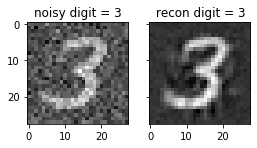

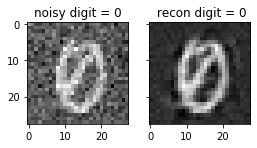

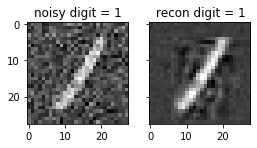

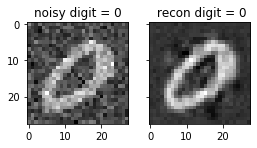

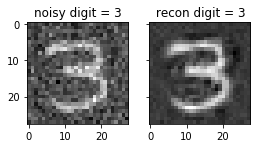

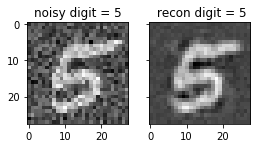

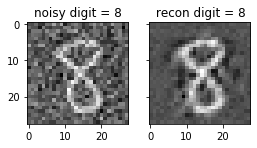

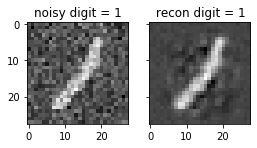

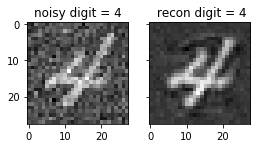

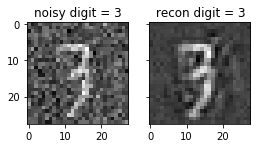

In [30]:
for idx in indexes:
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (4,4))
    ax1.imshow(np.reshape(X_noisy[idx,:], (28,28)),cmap= 'gray' )
    ax1.set_title('noisy digit = {}'.format(str(Y[idx])))
    ax2.imshow(np.reshape(X_reconstructed[idx,:], (28,28)),cmap= 'gray' )
    ax2.set_title(' recon digit = {}'.format(str(Y[idx])))
    # Fine-tune figure; make subplots farther from each other.
    #f.subplots_adjust(hspace=6.0, wspace = 6.0)
    
    plt.show()

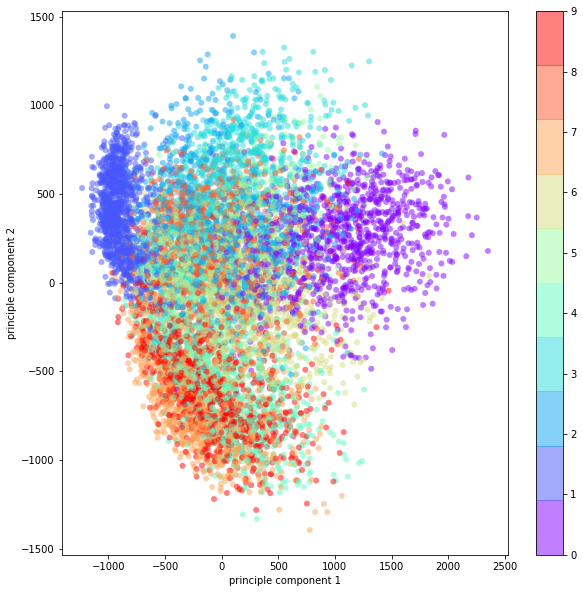

In [31]:
# We are using Y only for display purpose
plt.figure(figsize=(10,10))
plt.scatter(X_proj[:, 0], X_proj[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.colorbar();

C:\Users\18482\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


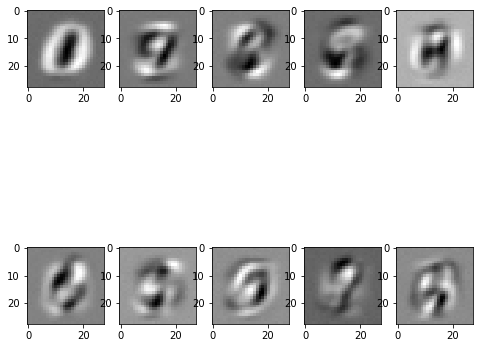

In [32]:
#Plotting the first 10 PCA basis, capturing the most variance as in image.
tenval=Vectors[:,:10]
fig=plt.figure(figsize=(8, 8))
for i in range(10):
    img = tenval[:,i]
    fig.add_subplot(2,5,i+1)
    plt.imshow(img.reshape((28,28)), cmap = 'gray')
fig.show()

C:\Users\18482\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


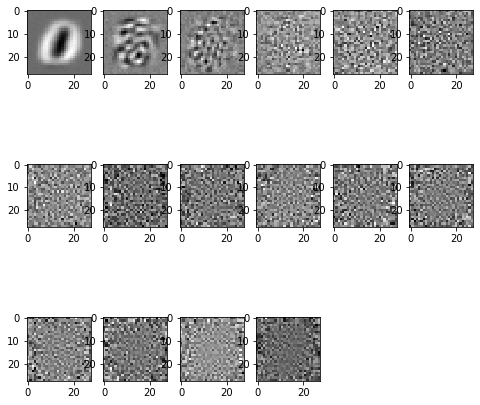

In [33]:
#plot basis as images in the interval size of 50, i.e plot 1, 50, 100 ... etc.
fig=plt.figure(figsize=(8, 8))
j=1
for i in range(0,784,50):
    img = Vectors[:,i]
    fig.add_subplot(3,6,j)
    j+=1
    plt.imshow(img.reshape((28,28)), cmap = 'gray')
fig.show()

In [34]:
#what is you observation about basis images after 150.

''''We can see that the first image corresponding to the first eigen vector is the most clear, 
the second image corresponding to the 50th eigen vector has considerable noise, the third image corresponding
to the 150th eigen vector has become unintelligible. And after that all the images are just noise and useless, 
which is what we suggested previously that beyond 117 all the images would be just equally bad.''' 

"'We can see that the first image corresponding to the first eigen vector is the most clear, \nthe second image corresponding to the 50th eigen vector has considerable noise, the third image corresponding\nto the 150th eigen vector has become unintelligible. And after that all the images are just noise and useless, \nwhich is what we suggested previously that beyond 117 all the images would be just equally bad."